# Explore here

In [19]:
import pandas as pd
d_data = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
d_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
duplicates = d_data[d_data.duplicated()]
duplicates

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [21]:
d_data = d_data.drop_duplicates().reset_index(drop = True)

In [22]:
d_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
d_data["sex_n"] = pd.factorize(d_data["sex"])[0]
d_data["smoker_n"] = pd.factorize(d_data["smoker"])[0]
d_data["region_n"] = pd.factorize(d_data["region"])[0]

In [24]:
d_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'sex_n',
       'smoker_n', 'region_n'],
      dtype='object')

In [25]:
X = d_data[["age", "smoker_n", "sex_n"]]
y = d_data[["charges"]]

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [27]:
# NEED TO INITIALIZE AND DEFINE THE MODEL AS A RANDOM FOREST CLASSIFIER AND CREATE A VARIABLE THAT REPRESENTS THAT MODEL which you imported with scikitlearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Assuming X_train and y_train are already defined
model = RandomForestClassifier(random_state=42)

# Fit the model with your training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Define hyperparameters for the GridSearchCV
hyperparams = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Perform GridSearchCV
grid = GridSearchCV(model, hyperparams, scoring="accuracy", cv=10)

#grid

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [29]:
# grid.best_params_

# Best model after grid search
best_model = grid.best_estimator_

In [30]:
# Predicting with the test set
y_pred = best_model.predict(X_test)

In [31]:
# Test set accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {accuracy}")

Test set accuracy: 1.0


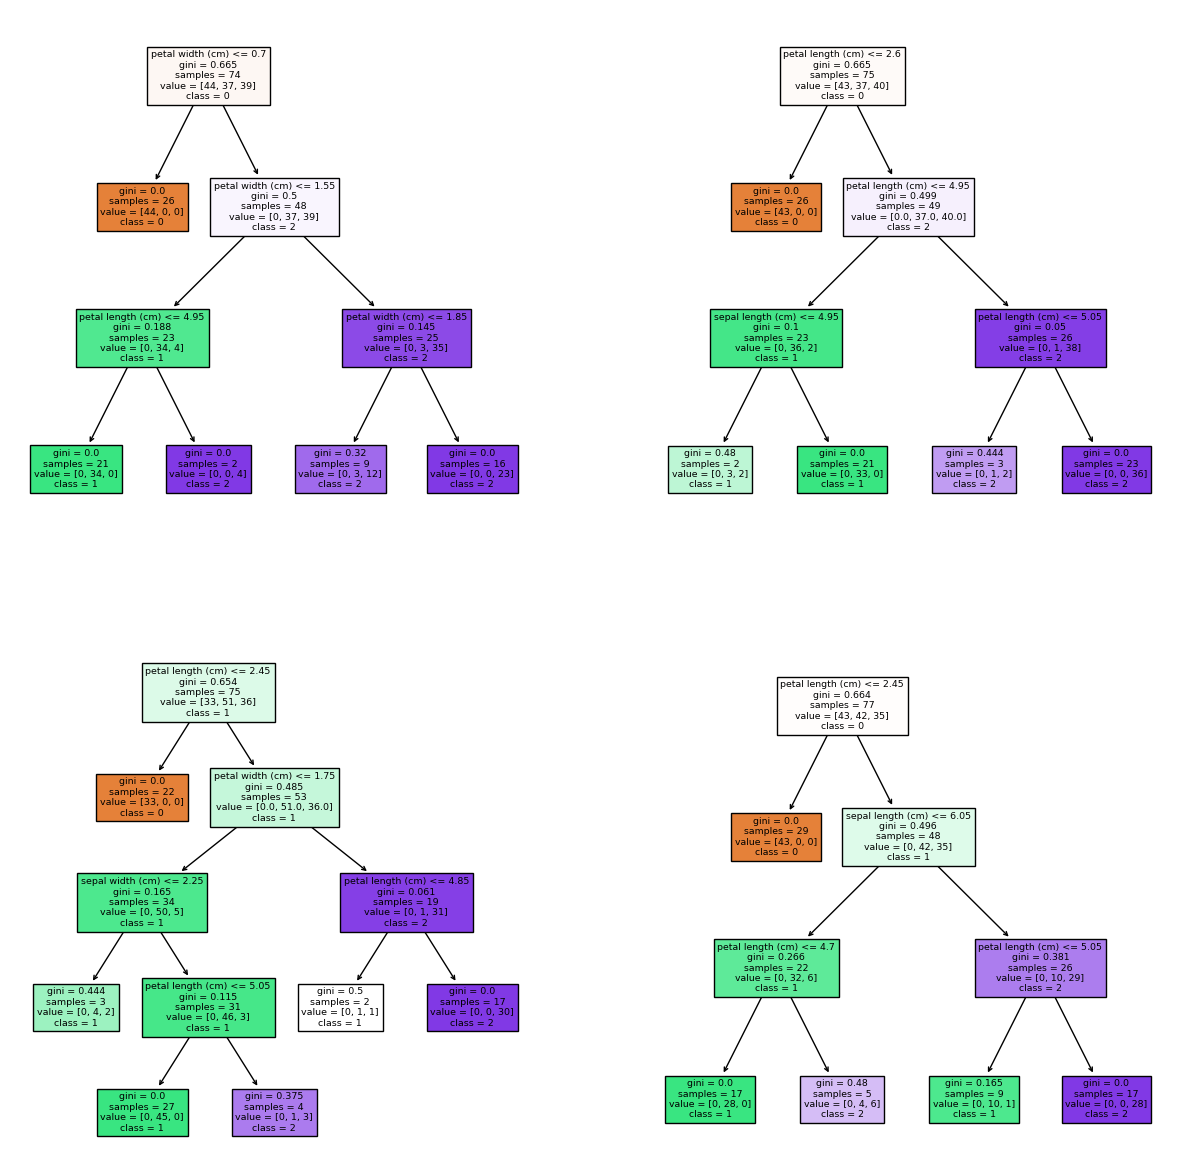

In [32]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best_model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best_model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best_model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best_model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [33]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [34]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [35]:
from pickle import dump

dump(model, open("RESULT_hyperparams_maxdepth_random_forest_classifier_default_42.sav", "wb"))